<a href="https://colab.research.google.com/github/AlyssonBaumgarten/reconhecimento/blob/main/C%C3%B3pia_de_aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [ ]:
set(y)

{0, 1, 2}

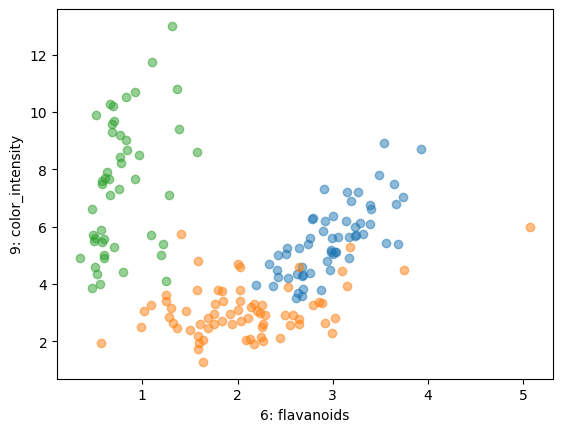

In [ ]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [ ]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([0.00011897, 0.00010562, 0.00012016, 0.00010705, 0.0069952 ]),
 'score_time': array([0.0096693 , 0.01230669, 0.00746274, 0.00449848, 0.0024991 ]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  2,  1],
       [ 0, 19,  5],
       [ 0,  4,  8]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7666619095190524

In [ ]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [ ]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.13964081e-04, 9.17911530e-05, 9.15527344e-05, 1.12295151e-04,
        8.96453857e-05]),
 'score_time': array([0.00341749, 0.00325465, 0.00337434, 0.00312304, 0.0030942 ]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [ ]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.06811523e-04, 1.14202499e-04, 1.08003616e-04, 1.04188919e-04,
        9.51290131e-05]),
 'score_time': array([0.03017807, 0.007725  , 0.02179241, 0.01192522, 0.02680993]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.16348267e-04, 1.17540359e-04, 1.10864639e-04, 1.02758408e-04,
        7.89165497e-04, 1.20401382e-04, 1.12295151e-04, 1.55687332e-04,
        1.05381012e-04, 1.04665756e-04, 1.09672546e-04, 1.05142593e-04,
        1.28746033e-04, 1.08003616e-04, 1.13964081e-04, 1.04427338e-04,
        1.21831894e-04, 1.17301941e-04, 1.52111053e-04, 1.10387802e-04,
        1.34468079e-04, 1.07049942e-04, 1.11818314e-04, 1.27553940e-04,
        1.26361847e-04, 1.09910965e-04, 1.01089478e-04, 9.67979431e-05,
        1.02519989e-04, 1.00374222e-04, 1.27077103e-04, 1.03712082e-04,
        1.10864639e-04, 1.28984451e-04, 1.05857849e-04, 1.05619431e-04,
        9.75131989e-05, 1.04188919e-04, 1.16825104e-04, 2.72512436e-04,
        1.25169754e-04, 9.94205475e-05, 1.10149384e-04, 1.17301941e-04,
        1.05857849e-04, 1.10864639e-04, 1.04665756e-04, 1.06096268e-04,
        1.05381012e-04, 1.03950500e-04]),
 'score_time': array([0.01491141, 0.00855207, 0.00801468, 0.00819588, 0.03070283,


In [ ]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50999

(Perceptron(), 0.0005617134727509441)

In [ ]:
modelo.intercept_

array([-105.,  114.,   19.])

In [ ]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

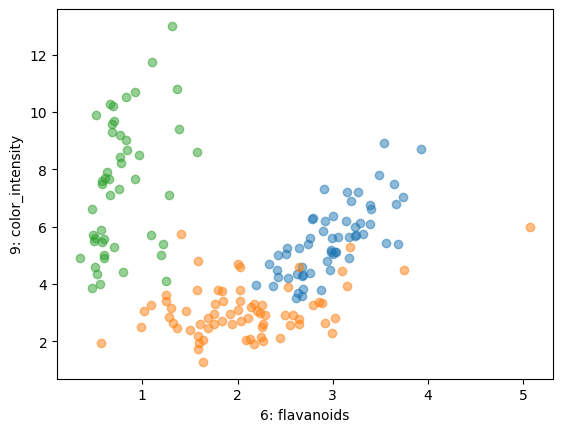

In [ ]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)


plt.show()



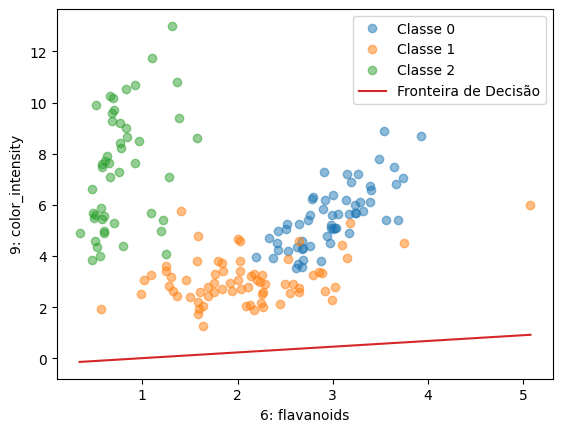

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y==k], X[:, j][y==k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_[0]  # Apenas os coeficientes da primeira classe

# Calcula e plota a reta que separa as classes
x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
y_vals = (-coef[i] / coef[j]) * x_vals - (modelo.intercept_[0] / coef[j])
plt.plot(x_vals, y_vals, label="Fronteira de Decisão")

# Adiciona uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exibe o gráfico
plt.show()


# Exibe o gráfico
plt.show()


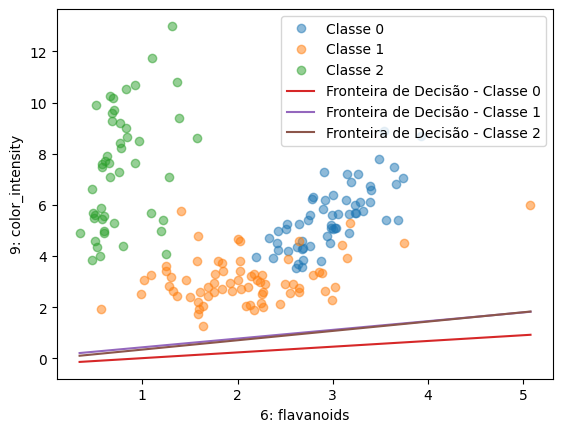

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_  # Coeficientes de todas as classes

# Calcula e plota a reta que separa as classes para cada classe
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, label=f"Fronteira de Decisão - Classe {c}")

# Adiciona uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exibe o gráfico
plt.show()


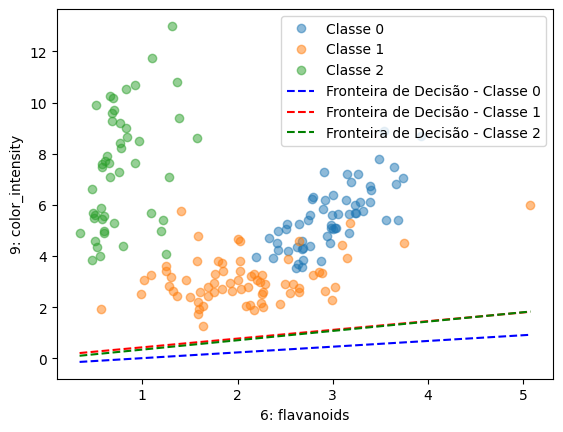

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defina os índices das características que serão usadas
i, j = 6, 9

# Defina os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Crie uma lista de cores para as fronteiras de decisão
cores = ['b', 'r', 'g']

# Plote os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_

# Calcula e plota a reta que separa as classes para cada classe usando cores diferentes
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, '--', color=cores[c], label=f"Fronteira de Decisão - Classe {c}")

# Adicione uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exiba o gráfico
plt.show()
